# Variable Concept Search Demo

This notebook can be used to generate a report for a concept search related to the World Modelers project. This concept could be a 'node' from a CAG or similarly generated sentence of phrase that describes a phenomenon or variable of interest. The concept will be parsed and grounded, as possible, using information from Wikimedia resources and principles from the Scientific Variables Ontology. Currently, grounding is done with respect to SVO and the World Modelers Indicators list.

Here are some examples of concepts for which this type of search is intended:

- crop production
- food insecurity
- water scarcity
- precipitation
- crop yield
- food availability
- drought
- temperature
- famine
- soil moisture


## Finding and Parsing Scientific Variables

In brief, the foundational concept on which this search is built is that, in order to completely describe a scientific variable, it is necessary to specify both the _**Phenomenon**_ observed, which is the object of the observation, and the _**Property**_, or characteristic of that phenomenon which one desires to describe. Properties are inherent in the Phenomena that possess them, and cannot exist by themselves. Temperature and price are examples of properties. In addition, if the Phenomenon observed involves a _**Process**_, then this should be specified as well. Similar to a Property, a Process is also dependent on the Phenomenon which undergoes it and does not exist in isolation. Motion and absorption are examples of processes. 

A Property can inhere in a variety of Phenomena, and similarly a Process can be part of a variety of Phenomena. Decoupling these three types of entities allows us to begin creating a modular representations of scientific variables rather than relying on taxonomic systems of representation which may quickly become redundant. For example, recognizing that ``oil price`` is a variable that can be decomposed into a Phenomenon ``oil`` (substance) and its Property, ``price``, allows us to reuse these two entities to create other variables, and allows us to more readily group, search for, and create a custom a variable of interest. In reality an observation will involve multiple Phenomena and Processes, and so decoupling these concepts allows us much more flexibility in representing a wide range of complex variables.

Additionally, _**Attributes**_ are specific properties for which the values are fixed for the duration of an observation. In certain modeling scenarios, certain attributes may be desirable or undesirable; in these cases, Attributes are usually referred to as the _**States**_ of a Phenomenon. Famine and drought are examples of States that are of interest in World Modelers. Attributes are usually used to group Phenomena by _type_, although in general it may not be the case that such _typing_ is always fixed for a particular area of interest, so a fixed categorization by attribute may be too restrictive. It is thus desirable to atomize Attributes as well.

There are other variable components that are relevant to quantiative variables; for more information, please consult the documentation for SVO.

## Performing a variable search.

The API developed creates a small "knowledge graph" representing some relevant concepts for a search term. This notebook illustrates some of the information that can be extracted from these knowledge packets.

Start off by importing the user interface, and then enter a desired search. Some examples have been pre-run below.

The search tool currently interacts with outside resources in a just-in-time fashion, where Wikimedia resources are parsed on the fly; therefore, results are slow to achieve. With greater computing resources and time, Wikimedia information could be pre-parsed and stored locally to greatly speed up search times. The limiting steps are (a) parsing Wikipedia pages with Stanza, the Stanford NLP tool, to get lists of more granular forms of a term and complex aspects of that term, such as processes undergone or properties of interest; and (b) querying the SVO SPARQL endpoint for highly common terms.

You may enable results from any search to be stored locally and then load the current knowledge graph in subsequent runs to obtain higher search speeds. World Modelers variables have been pre-run and the resulting knowledge graph has been stored in json format in the resources folder.

### Output Document Description

Calling the generate_document function in the user_interaction module generates a graph of nodes, expanded 'levels' levels deep around the root node. Each node is annotated with information about how it is defined, including its SVO category, as well as any associated World Modelers indicators and SVO Variables and corresponding match rank (on a scale of 0 to 1).

Along with the graph, returned as a Python dictionary, the function also outputs a report on the requested variable. The report includes the following elements:

1. A visual snapshot of the generated knowledge graph, expanded around the root node(s) (directly related to the search term). Only a subset of edges are illustrated to minimize clutter. The user can choose to create visualizations of other nodes by using the create_graph function in the knowledge_graph_visualizer module.

2. A short output about how the terms entered are categorized according to SVO -- do they identify a complete variable or only a part of one? -- along with information about what additional information would be necessary to completely specify a variable.

3. A list of the top five "types" associated with the terms entered. These are terms that could be used to more granularly specify the desired entity.

4. A list of the top five "aspects" associated with the term entered -- these could include terms that could be used to complete an incomplete variable or terms that could specify it more specifically.

5. A list of the top ten matching SVO variables, along with the correponding match rank (from 0 being the worst match to 1 being the best match).

## Examples

### Import the User Interaction utility

In [1]:
import user_interaction as ui
import knowledge_graph_visualizer as kg_viz

2020-06-19 15:39:12 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-06-19 15:39:12 INFO: Use device: cpu
2020-06-19 15:39:12 INFO: Loading: tokenize
2020-06-19 15:39:12 INFO: Loading: pos
2020-06-19 15:39:13 INFO: Loading: lemma
2020-06-19 15:39:13 INFO: Loading: depparse
2020-06-19 15:39:14 INFO: Loading: ner
2020-06-19 15:39:15 INFO: Done loading processors!


### Perform a search: WATER SCARCITY

The prompt to the user may not show up in a GitHub preview, so we have copied it here for convenience:

![alt text](images/water_scarcity_search_prompt.png)


What is the scientific variable you would like to describe?
Please keep your description relatively brief. Examples include:
crop yield, soil moisture, food availability, drought.

>>>   water scarcity


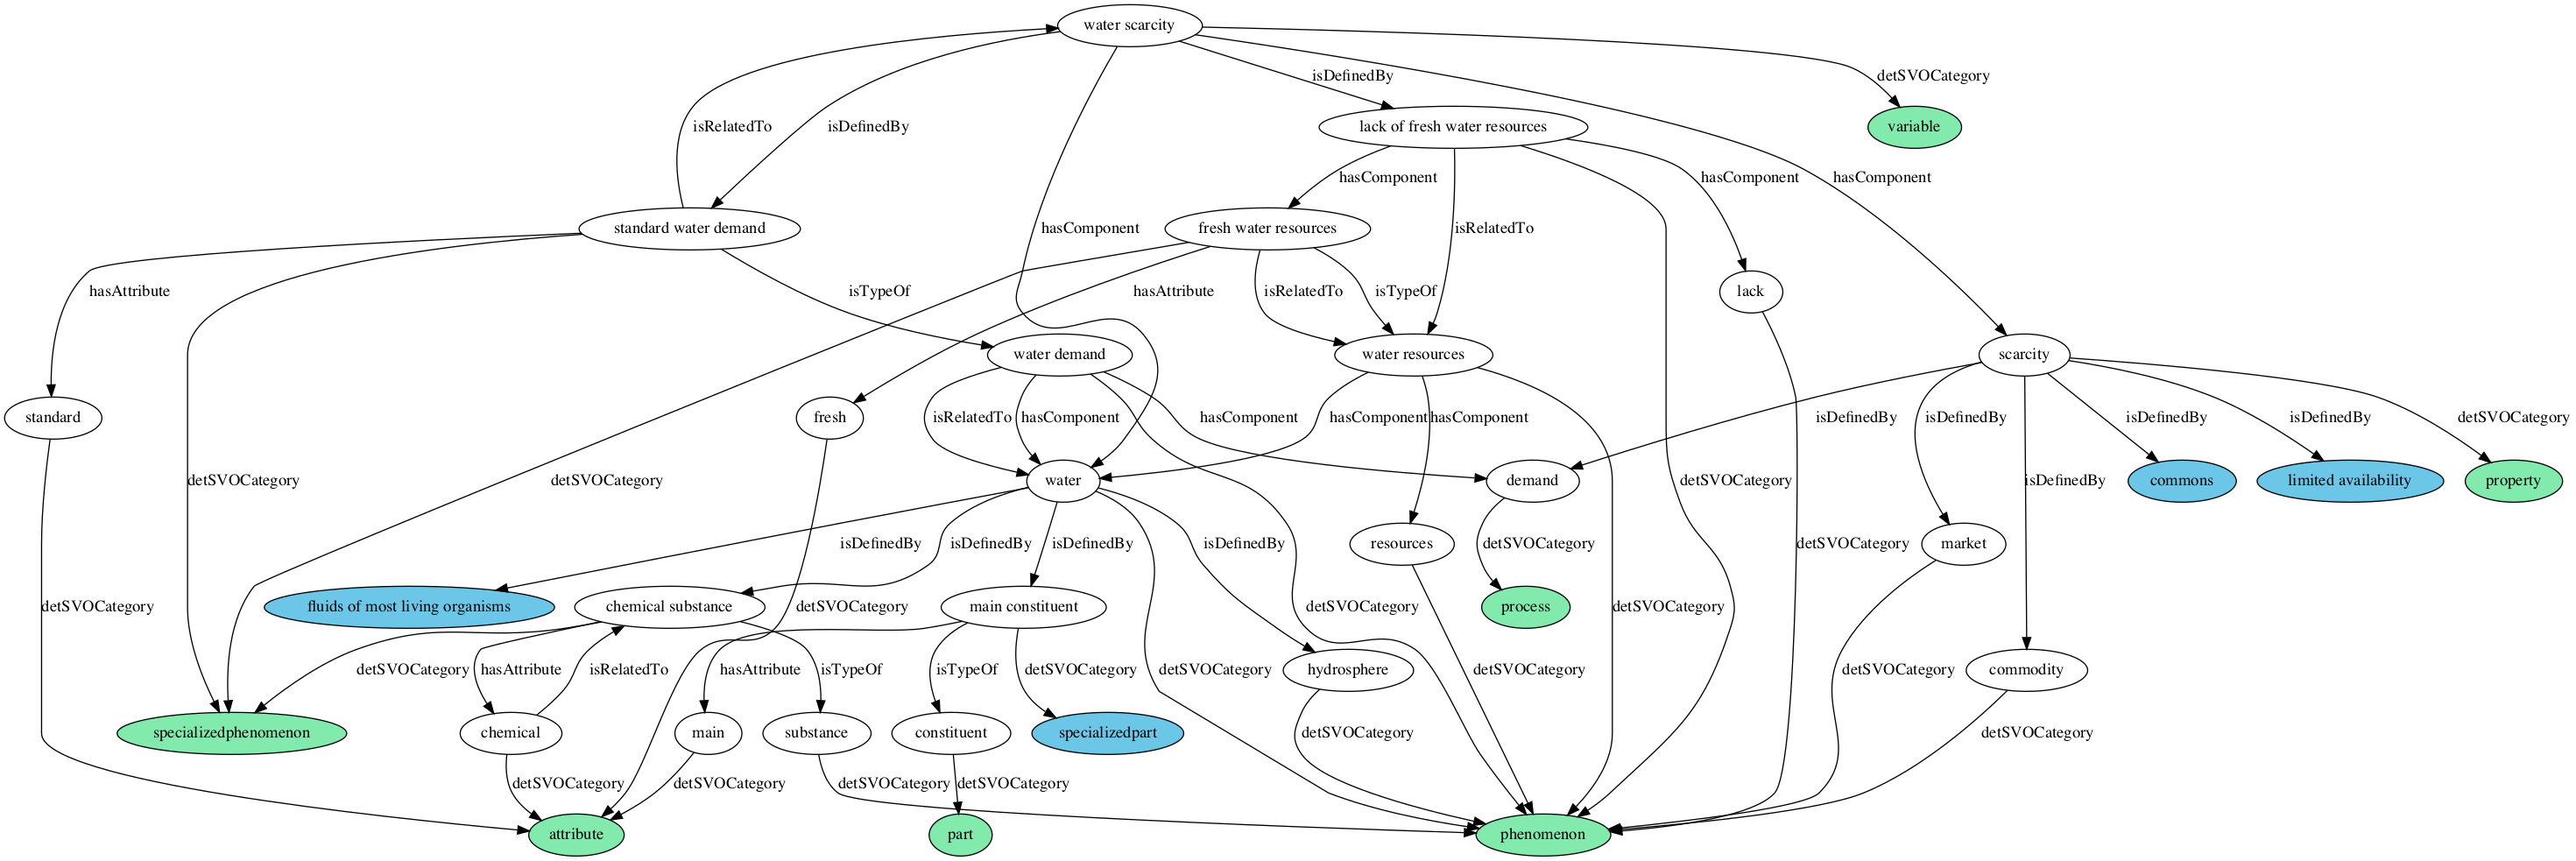

The terms you entered were classified as a Variable.
This is minimally sufficient to classify as a variable.
I found 3 types of water scarcity.
Here they are ...
	physical water scarcity
	economic water scarcity
	grave water scarcity
I found 17 more complex aspects of water scarcity.
Here are the first five ...
	severe water scarcity
	symptoms of physical water scarcity
	absolute water scarcity
	causes of water scarcity
	conditions of severe water scarcity
I found 105 World Modelers indicators related to this search.
Here are the first ten results ...
	Water productivity, total	0.365
	Percentage of livestock migrating due to water	0.25
	% of total water withdrawal, Water withdrawal for agricultural use	0.1825
	Production, Freshwater Fish	0.1825
	Other uses, Freshwater Fish	0.1825
	Export Quantity, Freshwater Fish	0.1825
	Domestic supply quantity, Freshwater Fish	0.1825
	Food, Freshwater Fish	0.1825
	Import Quantity, Freshwater Fish	0.1825
	Renewable internal freshwater resources, total

In [2]:
graph = ui.generate_document()

The "pretty print" report first shows a snapshot of nodes two "levels" away from the search term in the resulting graph. It also prints out alignments to the SVO and WM variables, as well as more granular 'types' of the term and 'aspects' of the term, such as its properties, processes, or ways it can be transformed.

We can also use the visualization tools to look at nodes around a different term in the resulting graph:

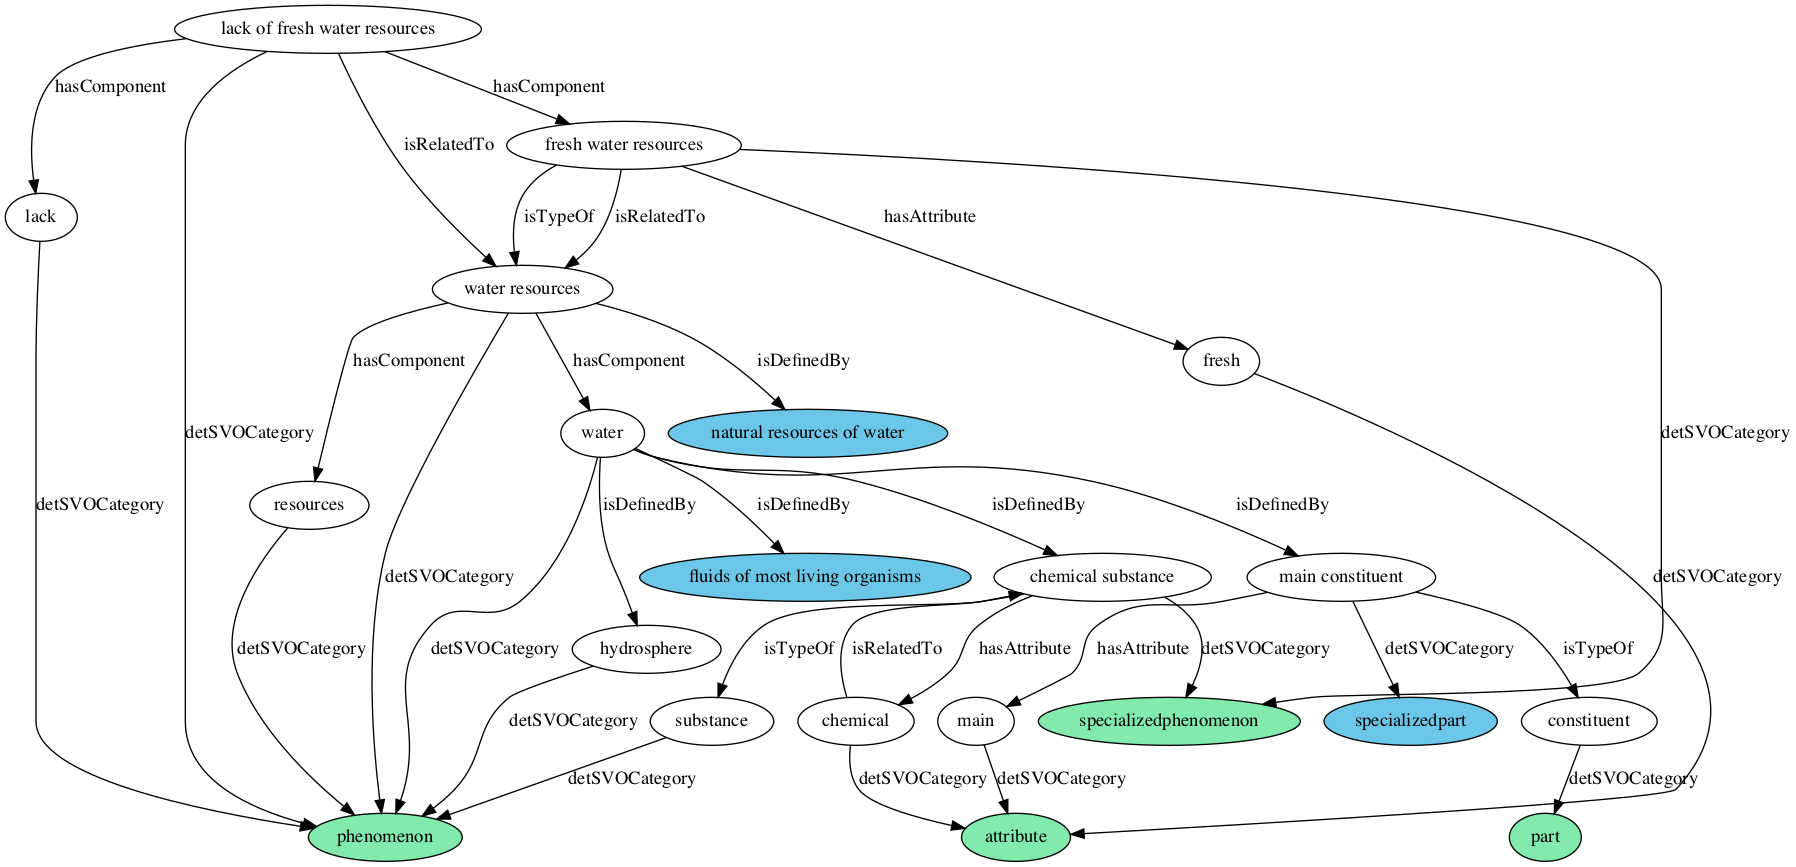

In [3]:
vizgraph = kg_viz.VisualGraph(graph, 'lack of fresh water resources')
vizgraph.display_graph()

All terms in the graph have been categorized into the major SVO domain-independent top-level categories described above. These categorizations are shown in green and are determined from (1) SVO groundings, (2) WiktiWordNet definitions, and (3) inheritance from component concepts. Blue nodes indicate "stubs" in the graph that have not been expanded.

### Perform search: DROUGHT

The prompt to the user may not show up in a GitHub preview, so we have copied it here for convenience:

![alt text](images/drought_search_prompt.png)

What is the scientific variable you would like to describe?
Please keep your description relatively brief. Examples include:
crop yield, soil moisture, food availability, drought.

>>>   drought


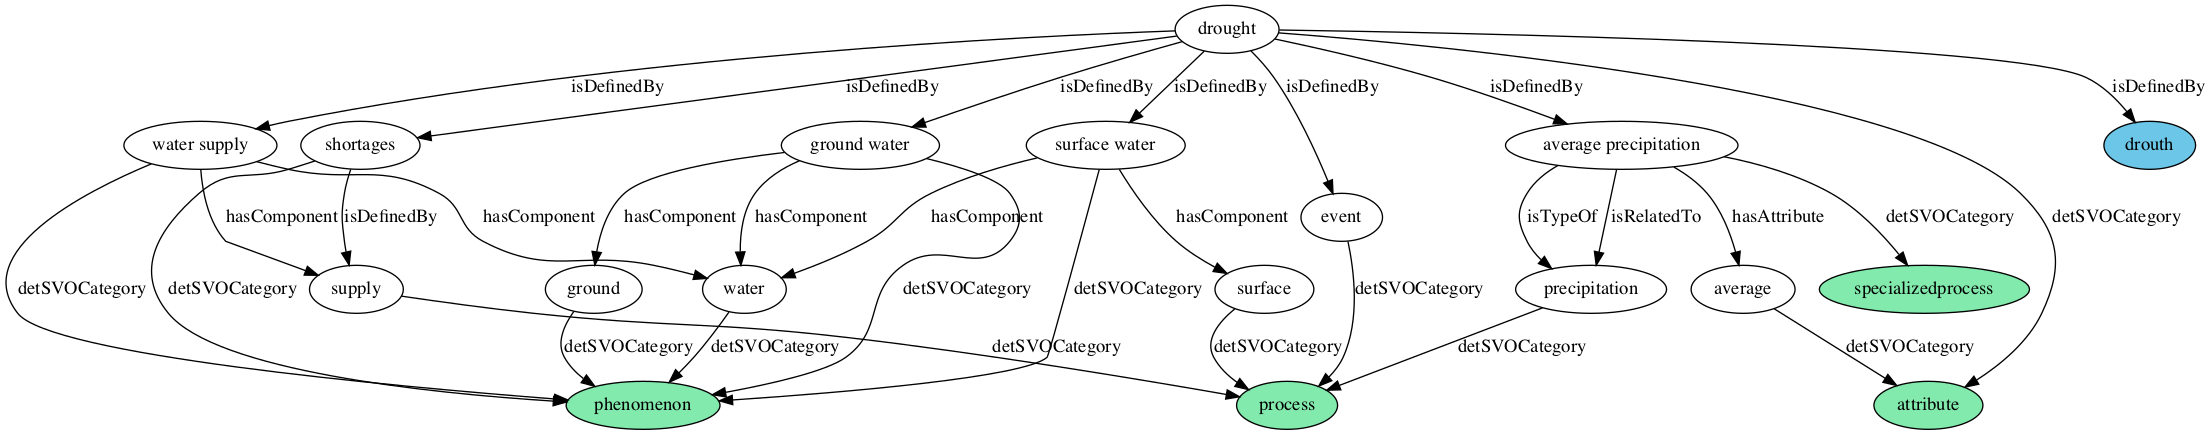

The terms you entered were classified as a Attribute.
You will need to identify a clear Phenomenon and Property to 
completely identify your variable.
I found 4 types of drought.
Here they are ...
	climate change increase drought
	extensive drought
	severe drought
	worst drought
I found 22 more complex aspects of drought.
Here are the first five ...
	droughts
	drought conditions
	adequate drought mitigation strategies
	chances of drought
	combination of drought
I found 44 World Modelers indicators related to this search.
Here are the first ten results ...
	Water productivity, total	0.12983571428571428
	Average Temperature	0.11857142857142856
	Average Precipitation	0.11857142857142856
	Percentage of livestock migrating due to water	0.08892857142857143
	Average precipitation in depth	0.08655714285714286
	Domestic supply quantity, Freshwater Fish	0.07973928571428571
	Renewable internal freshwater resources, total	0.07106875
	Share in Forest land, Planted Forest	0.06560952380952381
	Agricu

In [2]:
graph = ui.generate_document()

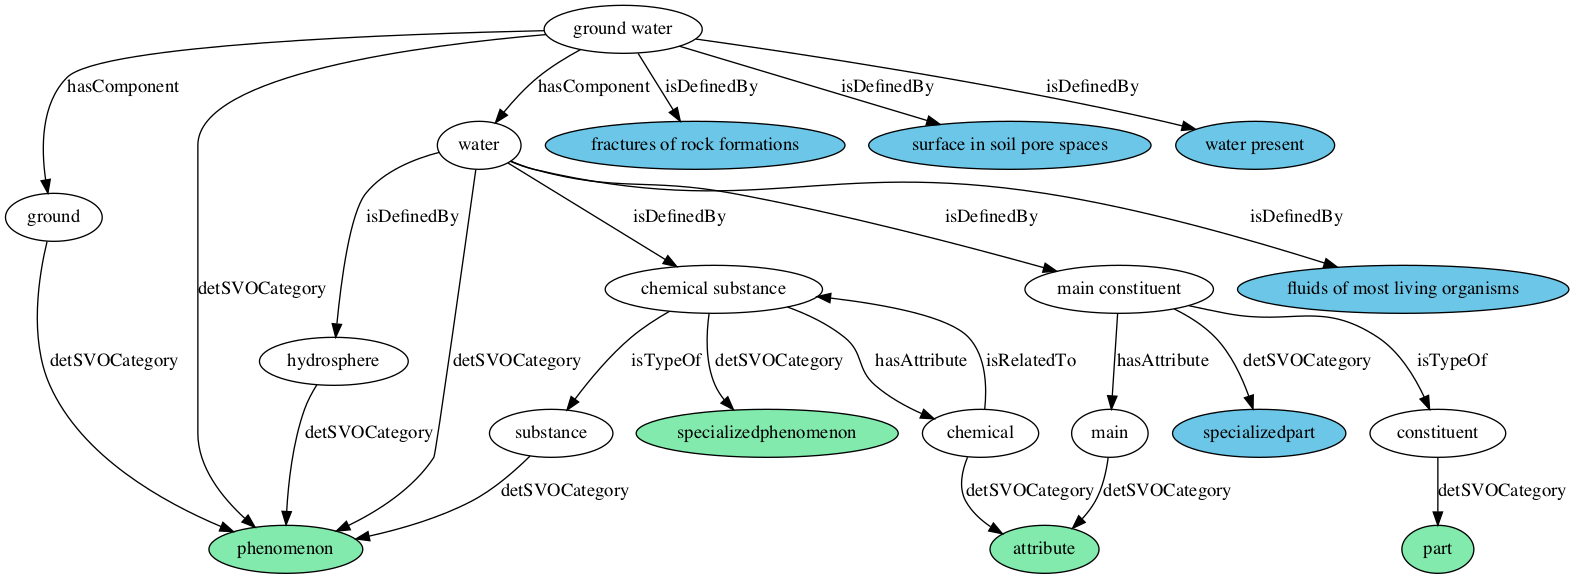

In [3]:
vizgraph = kg_viz.VisualGraph(graph, 'ground water')
vizgraph.display_graph()

### Perform Search: FAMINE

The prompt to the user may not show up in a GitHub preview, so we have copied it here for convenience:

![alt text](images/famine_search_prompt.png)

What is the scientific variable you would like to describe?
Please keep your description relatively brief. Examples include:
crop yield, soil moisture, food availability, drought.

>>>   famine


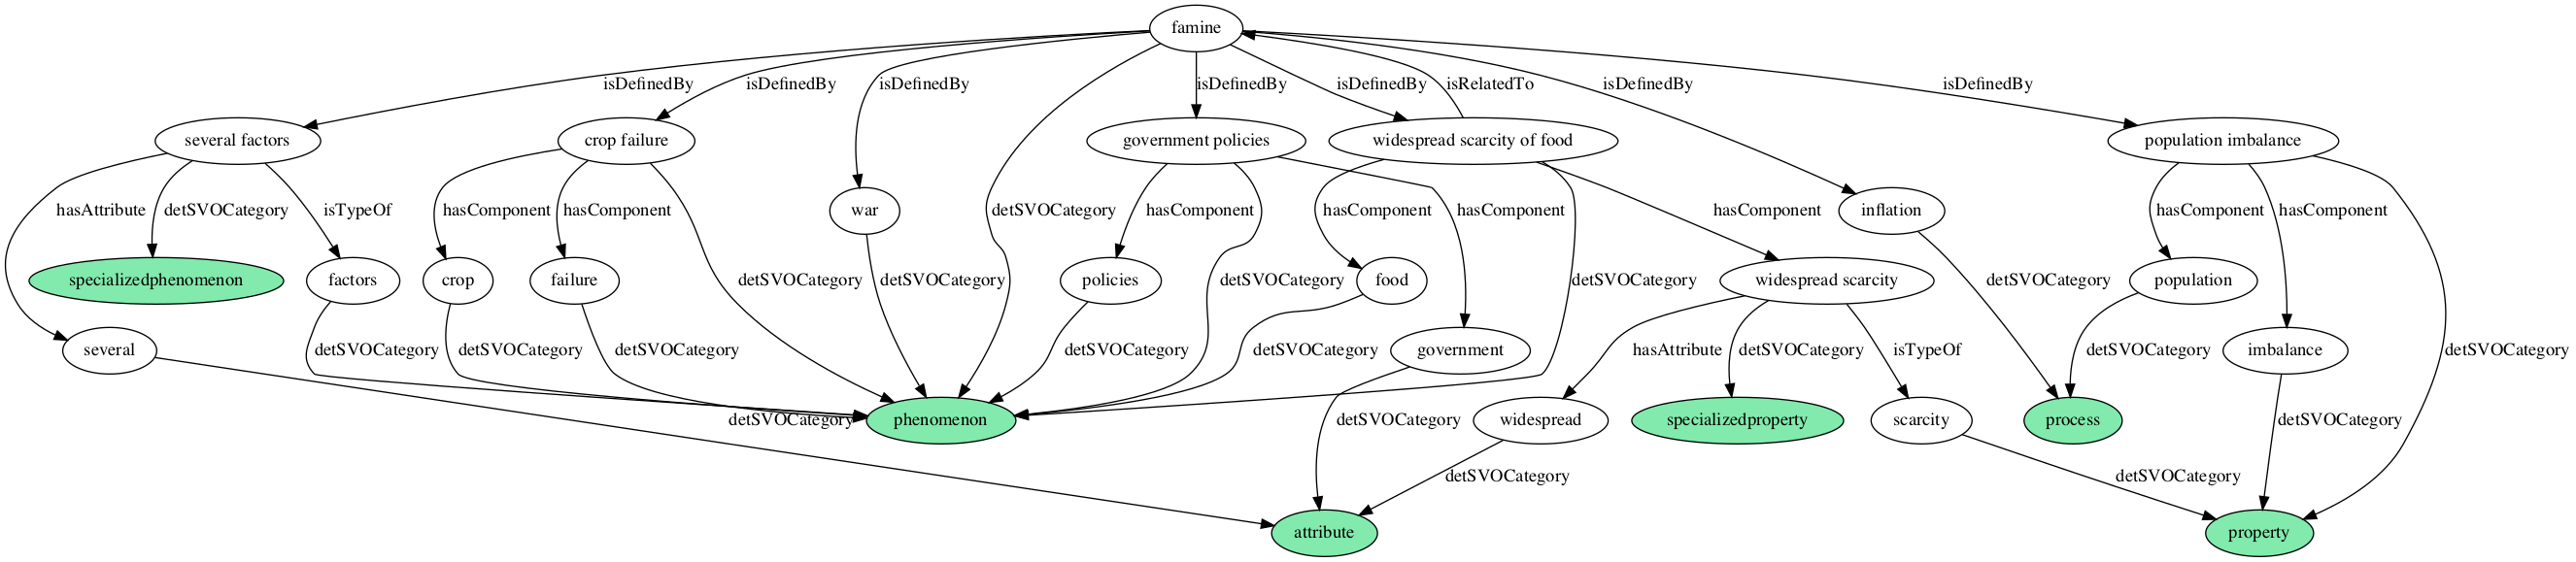

The terms you entered were classified as a Phenomenon.
You will need to specify the Property (or characteristic) of the Phenomenon
in order to completely define your variable.
I found 26 types of famine.
Here are the first five ...
	great famine
	ethiopian famine
	largest famine
	russian famine
	severe famine
I found 86 more complex aspects of famine.
Here are the first five ...
	famines
	worst famine
	famine relief
	famine years
	great famines
I found 24 World Modelers indicators related to this search.
Here are the first ten results ...
	Inflation Rate	0.08655714285714286
	Rural population	0.08083365882936508
	Military expenditure	0.07415721458333333
	Population	0.06853187311507936
	Population, total	0.06853187311507936
	Urban population	0.06853187311507936
	Food, Butter, Ghee	0.05928571428571428
	Food, Demersal Fish	0.05928571428571428
	Food, Soyabean Oil	0.05928571428571428
	Food, Pigmeat	0.05928571428571428
I found 0 SVO variable related to this search.
Here they are ...


In [4]:
graph = ui.generate_document()

Again, we can look at a certain part of the graph in more depth to see how it was categorized and broken down.

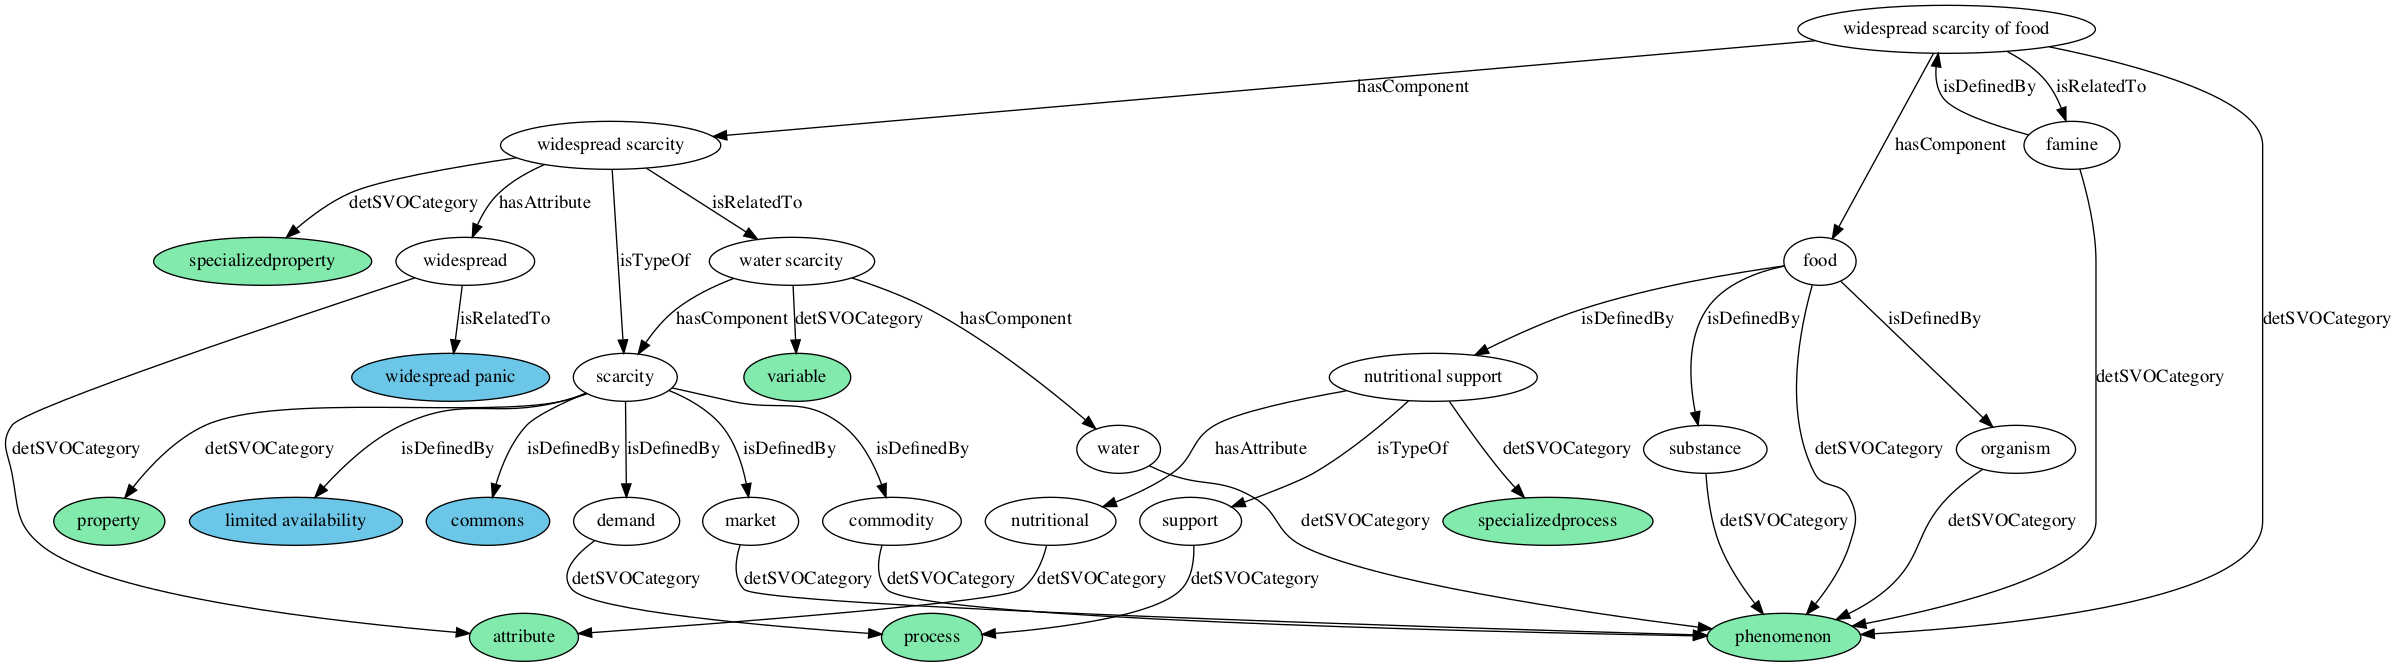

In [5]:
vizgraph = kg_viz.VisualGraph(graph, 'widespread scarcity of food')
vizgraph.display_graph()

We can also explore the graph directly to obtain additional information about a node that has not been included in the visualization.

In [6]:
graph.graph['food'].keys()

dict_keys(['add_components', 'detSVOCategory', 'hasSVOEntity', 'hasSVOVar', 'hasWMIndicator', 'hasWWNCategory', 'hasWWNDefinition', 'isClsRel', 'isComponentOf', 'isDefinedBy', 'isWWNDefinedBy', 'lemma_seq', 'modified_terms', 'pos_seq', 'term_aspects', 'type'])

In [7]:
graph.graph['food']['hasWWNCategory']

['Matter']

In [8]:
graph.graph['food']['isWWNDefinedBy']

['life', 'order', 'organisms', 'solid substance']

### Perform search: TEMPERATURE

The prompt to the user may not show up in a GitHub preview, so we have copied it here for convenience:

![alt text](images/temperature_search_prompt.png)

What is the scientific variable you would like to describe?
Please keep your description relatively brief. Examples include:
crop yield, soil moisture, food availability, drought.

>>>   temperature


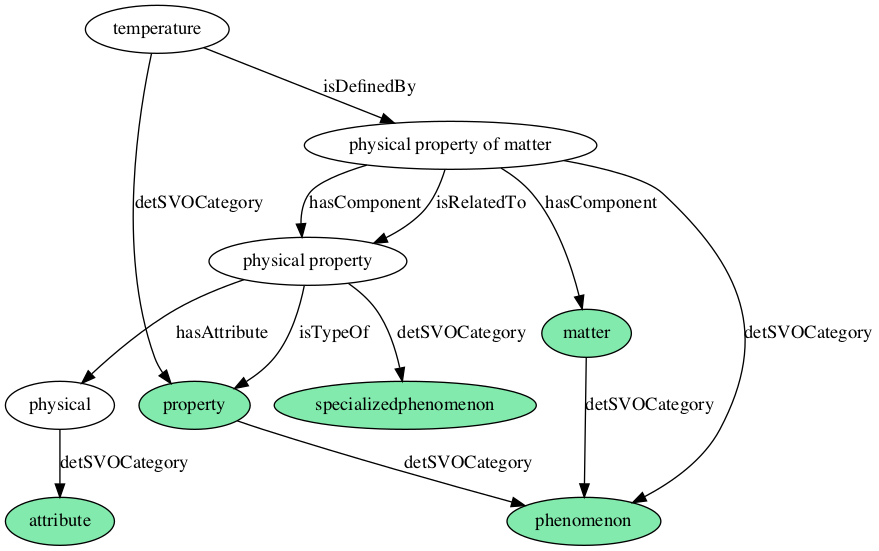

The terms you entered were classified as a Property.
You will need to specify the Phenomenon observed (object of observation)
in order to completely define your variable.
I found 21 types of temperature.
Here are the first five ...
	thermodynamic temperature
	absolute temperature
	same temperature
	reference temperature
	empirical temperature
I found 62 more complex aspects of temperature.
Here are the first five ...
	absolute zero of temperature
	empirical temperature scales
	thermodynamic temperature scale
	accurate temperature measurement
	notion of temperature
I found 110 World Modelers indicators related to this search.
Here are the first ten results ...
	Average Temperature	1.0
	Import Value, Tallow	0.1825
	Import Quantity, Tallow	0.1825
	Average Precipitation	0.09222222222222222
	Intentional homicides	0.08899269535736151
	Adjusted net savings, excluding particulate emission damage	0.06916666666666667
	Adjusted net savings, including particulate emission damage	0.0691666666666666

In [2]:
graph = ui.generate_document()

In the search for temperature, we obtain a simple graph that tells us all of the information we need. Temperature is a property and needs an accompanying phenomenon to completely identify a variable. Additionally, from its definition term, we see that the phenomenon will need to be some form of matter, such as air or temperature.

### Load WM Indicators graph and search for term.

Due to filesize limitations on GitHub, the world modelers indicators knowledge graph has been provided in zipped format. Before executing these steps, make sure to unzip the file.